In [1]:
import numpy as np
import pandas as pd

In [2]:
data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2023-10-09 22:42:24--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv'

     0K .......... .......... .......... .......... ..........  3%  209K 7s
    50K .......... .......... .......... .......... ..........  6% 8.76M 3s
   100K .......... .......... .......... .......... .......... 10%  204K 4s
   150K .......... .......... .......... .......... .......... 13%  216K 4s
   200K .......... .......... .......... .......... .......... 17% 8.03M 3s
   250K .......... .......... .......... .......... .......... 20%  211K 4s
   300K .......... .......... .......... .......... .......... 24%  58

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [21]:
cols=list(df.dtypes[df.dtypes=='object'].index)
for c in cols:
    df[c]=df[c].str.lower().str.replace(' ','_')

In [22]:
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135


In [23]:
cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [56]:
categorical_col=['make',
 'model','transmission_type','vehicle_style']
numerical=['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [28]:
df.engine_cylinders=df.engine_cylinders.fillna(0)
df.engine_hp=df.engine_hp.fillna(0)

In [29]:
df['above_average']=(df.msrp>df.msrp.mean()).astype('int')

In [30]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,above_average
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,1
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,1
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [57]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
y_train=df_train.above_average.values
y_val=df_val.above_average.values
y_test=df_test.above_average.values
df_train=df_train[categorical_col+numerical]
df_val=df_val[categorical_col+numerical]
df_test=df_test[categorical_col+numerical]

In [59]:
#del df_train['msrp']
#del df_val['msrp']
#del df_test['msrp']


In [33]:
from sklearn.metrics import roc_auc_score

In [70]:
#q1
dicts={}
for n in numerical:
    score=roc_auc_score(y_train,df_train[n])
    if score<0.5:
        score=roc_auc_score(y_train,-df_train[n])
    dicts.update({n:score})


In [71]:
dicts
#answer is engine_hp

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.6330587871772013,
 'city_mpg': 0.6734244643245233}

In [63]:
#q2
dv=DictVectorizer(sparse=False)
dict_train=df_train[categorical_col+numerical].to_dict(orient='records')
x_train=dv.fit_transform(dict_train)
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
dict_val=df_val[categorical_col+numerical].to_dict(orient='records')
x_val=dv.transform(dict_val)
y_pred=model.predict_proba(x_val)[:,1]
round(roc_auc_score(y_val,y_pred),3)

0.98

In [68]:
#q3
threshold=np.linspace(0,1,101)


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [73]:
res=[]
for t in threshold:
    tp=((y_pred>=t)&(y_val==1)).sum()
    tn=((y_pred<t)&(y_val==0)).sum()
    fp=((y_pred>=t)&(y_val==0)).sum()
    fn=((y_pred<t)&(y_val==1)).sum() 
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)  
    res.append((t,tp,fp,tn,fn,precision,recall))

C:\Users\0\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [92]:
df_res=pd.DataFrame(res,columns=['t','tp','fp','tn','fn','precision','recall'])
df_res.columns
df_res.head(2)

,t,tp,fp,tn,fn,precision,recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,781,948,2,0.454990,0.996942


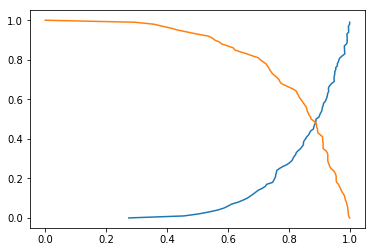

In [93]:
import matplotlib.pyplot as plt
plt.plot(df_res.precision,threshold)
plt.plot(df_res.recall,threshold)
plt.show()

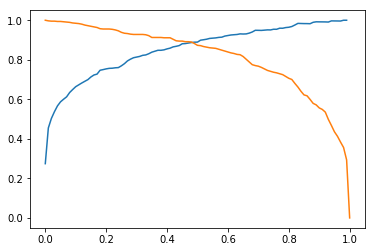

In [94]:
plt.plot(threshold,df_res.precision)
plt.plot(threshold,df_res.recall)
plt.show()

In [95]:
#q4
f1=(2*df_res.precision*df_res.recall)/(df_res.precision+df_res.recall)

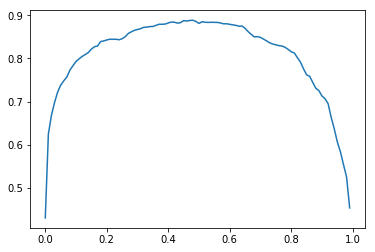

In [97]:
plt.plot(threshold,f1)
plt.show()

In [98]:
#q5
from sklearn.model_selection import KFold

In [99]:
kfold=KFold(n_splits=5, shuffle=True, random_state=1)

In [105]:
def train_final(c):
    scores=[]
    for train_index,val_index in kfold.split(df_train_full):
        DF_train=df_train_full.iloc[train_index]
        DF_val=df_train_full.iloc[val_index]
        Y_train=DF_train.above_average.values
        Y_val=DF_val.above_average.values
        dictt=DF_train[categorical_col+numerical].to_dict(orient='record')
        dv=DictVectorizer(sparse=False)
        X_train=dv.fit_transform(dictt)
        model=LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(X_train,Y_train)
        dictt=DF_val[categorical_col+numerical].to_dict(orient='record')
        X_val=dv.transform(dictt)
        Y_pred=model.predict_proba(X_val)[:,1]
        auc=roc_auc_score(Y_val,Y_pred)
        scores.append(auc)
    return scores
        

In [106]:
score=train_final(1)

In [107]:
round(np.std(score),3)

0.003

In [109]:
#q6
C=[0.01, 0.1, 0.5, 10]
for c in C:
    scores=train_final(c)
    scores=np.array(scores)
    print(round(scores.mean(),3),' ',c,' ',round(scores.std(),3))

0.952   0.01   0.002
0.972   0.1   0.002
0.979   0.5   0.002
0.981   10   0.002
